In [1]:
using PyPlot
using Ananke

┌ Info: Precompiling Ananke [top-level]
└ @ Base loading.jl:1664


# X-dir PLM

In [2]:
Nx,Ny,Nz = 1024,1,1;
nx,ny,nz = 1024,1,1;
Lx,Ly,Lz = [0,1],[0,1],[0,1];
nothingfunction(args...) = nothing;
prob = ProblemConstrcut(  ; N = (Nx,Ny,Nz),
                            n = (nx,ny,nz),
                           Lx = Lx,
                           Ly = Lx,
                           Lz = Lx,
                 SpatialOrder = 2,  
                   TimelOrder = 2,
                           T  = Float32,
                       Bfield = false,
                       Nghost = 4,
                      EOSType = "Adiabatic",
                     Boundary = ["Outflow","Outflow",
                                 "Outflow","Outflow",
                                 "Outflow","Outflow"],
                      usr_foo = nothingfunction)

MHDFlows Problem
  │    Features
  |     ├──────────── EOS: Adiabatic
  │     ├──────── B-field: OFF
  ├─────├── spatial Order: 2
  │     ├───── time Order: 2
  │     ├───── resolution: (1024, 1, 1)
  │     └─────── boundary:  x₁(L/R) ("Outflow", "Outflow")
  │                         x₂(L/R) ("Outflow", "Outflow")
  │                         x₃(L/R) ("Outflow", "Outflow")
  │     Setting                                            
  │     ├─────────── grid: grid (on GPU)
  │     ├─────────── flux: flux
  │     ├── user function: usr_func
  └─────├─ conserved Vars: sol.U
        ├─primitived Vars: sol.W
        └────────── clock: clock


In [3]:
function pgen_SodX!(prob)
  grid     = prob.grid;
  nx,ny,nz = grid.Nx,grid.Ny,grid.Nz;
  x1,x2,x3 = grid.x1,grid.x2,grid.x3;

  IDN,IEN,IPR  = prob.grid.ind.ρ ,prob.grid.ind.e ,prob.grid.ind.P;
  IVX,IVY,IVZ  = prob.grid.ind.v₁,prob.grid.ind.v₂,prob.grid.ind.v₃;
  nx,ny,nz = prob.grid.nx,prob.grid.ny,prob.grid.nz;
    
  P = zeros(eltype(grid),size(prob.sol.U)[1:3]);
  ρ = zeros(eltype(grid),size(prob.sol.U)[1:3]);
  ρL = 1.0;
  PL = 1.0;
  ρR = 0.125;
  PR = 0.1;

  @. ρ[x1.x1f.>=0.5,:,:] = ρR;
  @. P[x1.x1f.>=0.5,:,:] = PR;
  @.  ρ[x1.x1f.<0.5,:,:] = ρL;
  @.  P[x1.x1f.<0.5,:,:] = PL;
  SetUpProblemIC!(prob;  ρ = ρ,  p = P)
  return nothing
end

pgen_SodX! (generic function with 1 method)

In [4]:
pgen_SodX!(prob)
TimeIntegrator!(prob,0.125,30000;
               usr_dt = 0.0,
             CFL_Coef = 0.3,
                diags = [],
          loop_number = 100,
                 save = false,
             save_loc = "",
             filename = "",
          file_number = 0,
              dump_dt = 0)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter /home/doraho/.julia/packages/ProgressMeter/sN2xr/src/ProgressMeter.jl:618
Simulation in rogress :   2%|▂         |  ETA: 0:19:23 (39.59 ms/it)
  Progress:  iter/Nₒ = 625/30000, t/t₀ = 0.125/0.125

Total CPU/GPU time run = 24.697 s,Mzone update per second = 0.026 


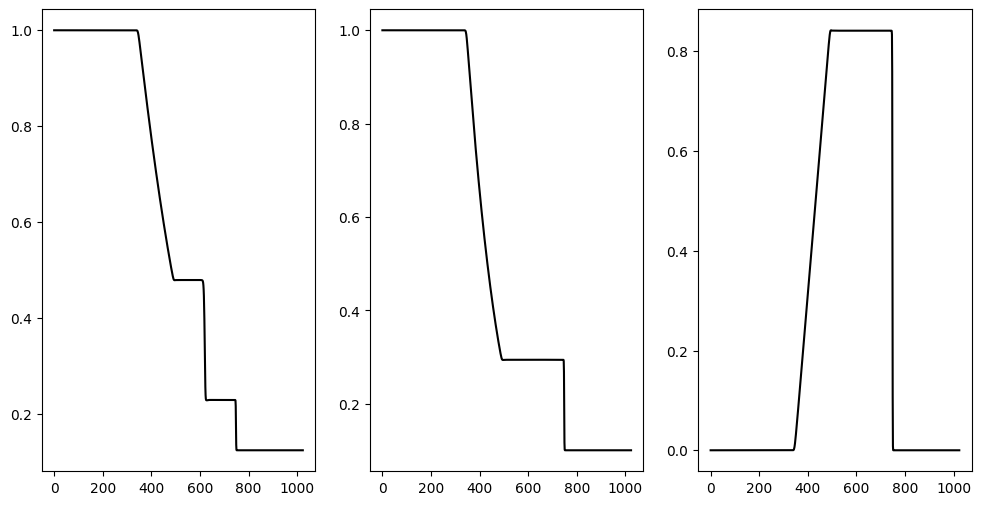

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f85aa041a90>

In [5]:
w = prob.sol.W;
wl= prob.tmp.wl;
wr= prob.tmp.wr;
 F= prob.flux.F;
IDN,IEN,IPR  = prob.grid.ind.ρ::Int ,prob.grid.ind.e::Int ,prob.grid.ind.P::Int ;
IVX,IVY,IVZ  = prob.grid.ind.v₁::Int,prob.grid.ind.v₂::Int,prob.grid.ind.v₃::Int;
is,ie = prob.grid.x1.is::Int,prob.grid.x1.ie::Int;
js,je = prob.grid.x2.js::Int,prob.grid.x2.je::Int;
ks,ke = prob.grid.x3.ks::Int,prob.grid.x3.ke::Int;

figure(figsize=(12,6))
subplot(131);

d = w[:,js,ks,IDN];
plot(d[is:ie],"k")

subplot(132);

d = w[:,js,ks,IPR];
plot(d[is:ie],"k")

subplot(133);

d = w[:,js,ks,IVX];
plot(d[is:ie],"k")

# X-dir PPM

In [6]:
Nx,Ny,Nz = 1024,1,1;
nx,ny,nz = 1024,1,1;
Lx,Ly,Lz = [0,1],[0,1],[0,1];
nothingfunction(args...) = nothing;
prob = ProblemConstrcut(  ; N = (Nx,Ny,Nz),
                            n = (nx,ny,nz),
                           Lx = Lx,
                           Ly = Lx,
                           Lz = Lx,
                 SpatialOrder = 3,  
                   TimelOrder = 2,
                           T  = Float32,
                       Bfield = false,
                       Nghost = 4,
                      EOSType = "Adiabatic",
                     Boundary = ["Outflow","Outflow",
                                 "Outflow","Outflow",
                                 "Outflow","Outflow"],
                      usr_foo = nothingfunction)

MHDFlows Problem
  │    Features
  |     ├──────────── EOS: Adiabatic
  │     ├──────── B-field: OFF
  ├─────├── spatial Order: 3
  │     ├───── time Order: 2
  │     ├───── resolution: (1024, 1, 1)
  │     └─────── boundary:  x₁(L/R) ("Outflow", "Outflow")
  │                         x₂(L/R) ("Outflow", "Outflow")
  │                         x₃(L/R) ("Outflow", "Outflow")
  │     Setting                                            
  │     ├─────────── grid: grid (on GPU)
  │     ├─────────── flux: flux
  │     ├── user function: usr_func
  └─────├─ conserved Vars: sol.U
        ├─primitived Vars: sol.W
        └────────── clock: clock


In [7]:
function pgen_SodX!(prob)
  grid     = prob.grid;
  nx,ny,nz = grid.Nx,grid.Ny,grid.Nz;
  x1,x2,x3 = grid.x1,grid.x2,grid.x3;

  IDN,IEN,IPR  = prob.grid.ind.ρ ,prob.grid.ind.e ,prob.grid.ind.P;
  IVX,IVY,IVZ  = prob.grid.ind.v₁,prob.grid.ind.v₂,prob.grid.ind.v₃;
  nx,ny,nz = prob.grid.nx,prob.grid.ny,prob.grid.nz;
    
  P = zeros(eltype(grid),size(prob.sol.U)[1:3]);
  ρ = zeros(eltype(grid),size(prob.sol.U)[1:3]);
  ρL = 1.0;
  PL = 1.0;
  ρR = 0.125;
  PR = 0.1;

  @. ρ[x1.x1f.>=0.5,:,:] = ρR;
  @. P[x1.x1f.>=0.5,:,:] = PR;
  @.  ρ[x1.x1f.<0.5,:,:] = ρL;
  @.  P[x1.x1f.<0.5,:,:] = PL;
  SetUpProblemIC!(prob;  ρ = ρ,  p = P)
  return nothing
end

pgen_SodX! (generic function with 1 method)

In [8]:
pgen_SodX!(prob)
TimeIntegrator!(prob,0.125,30000;
               usr_dt = 0.0,
             CFL_Coef = 0.3,
                diags = [],
          loop_number = 100,
                 save = false,
             save_loc = "",
             filename = "",
          file_number = 0,
              dump_dt = 0)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter /home/doraho/.julia/packages/ProgressMeter/sN2xr/src/ProgressMeter.jl:618
Simulation in rogress :   2%|▂         |  ETA: 0:13:20 (27.23 ms/it)
  Progress:  iter/Nₒ = 624/30000, t/t₀ = 0.125/0.125

Total CPU/GPU time run = 16.994 s,Mzone update per second = 0.038 


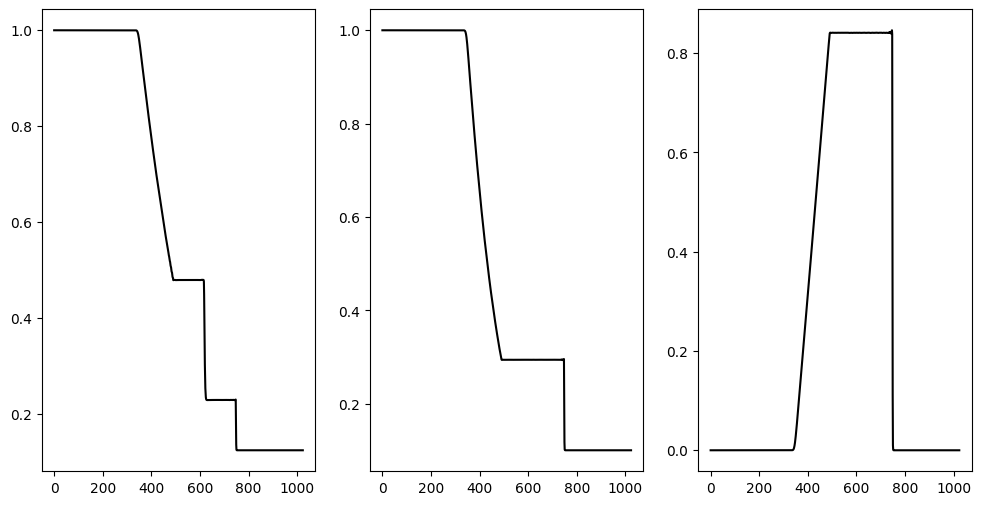

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb6091d6358>

In [9]:
w = prob.sol.W;
wl= prob.tmp.wl;
wr= prob.tmp.wr;
 F= prob.flux.F;
IDN,IEN,IPR  = prob.grid.ind.ρ::Int ,prob.grid.ind.e::Int ,prob.grid.ind.P::Int ;
IVX,IVY,IVZ  = prob.grid.ind.v₁::Int,prob.grid.ind.v₂::Int,prob.grid.ind.v₃::Int;
is,ie = prob.grid.x1.is::Int,prob.grid.x1.ie::Int;
js,je = prob.grid.x2.js::Int,prob.grid.x2.je::Int;
ks,ke = prob.grid.x3.ks::Int,prob.grid.x3.ke::Int;

figure(figsize=(12,6))
subplot(131);

d = w[:,js,ks,IDN];
plot(d[is:ie],"k")

subplot(132);

d = w[:,js,ks,IPR];
plot(d[is:ie],"k")

subplot(133);

d = w[:,js,ks,IVX];
plot(d[is:ie],"k")